In [1]:
!pip install pandas openpyxl matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

# Load specific sheets
fact = pd.read_excel("Dummy data-Technical interview.xlsx", sheet_name="Fact_Sales")
dim_product = pd.read_excel("Dummy data-Technical interview.xlsx", sheet_name="Dim_Product")
dim_person = pd.read_excel("Dummy data-Technical interview.xlsx", sheet_name="Dim_HR")

# Display first few rows (optional)
fact.head(), dim_product.head(), dim_person.head()


(   ID Client       Date  Units Sold  Target  Country ID  Product ID  \
 0          1 2020-01-01          99      25           1           1   
 1          1 2020-01-02         101       6           1           1   
 2          1 2020-01-03          22      90           1           1   
 3          1 2020-01-04          13      53           1           1   
 4          1 2020-01-05          65       8           1           1   
 
    SalespersonID  
 0              5  
 1             11  
 2              2  
 3             13  
 4              8  ,
    Product ID Product Name Product Category  Price Per Unit
 0           1           PC         Hardware            1200
 1           2    Antivirus         Software             300
 2           3      Headset      Electronics             200
 3           4   Controller           Gaming             450
 4           5      Monitor          Display            2500,
    Person ID First Name        Last Name    Job Title  Country      Gender  \

In [4]:
# Merge Fact + Product dimension
df = fact.merge(dim_product, on="Product ID", how="left")

# Merge Fact + Person dimension
df = df.merge(dim_person, left_on="SalespersonID", right_on="Person ID", how="left")

df.head()


,ID Client,Date,Units Sold,Target,Country ID,Product ID,SalespersonID,Product Name,Product Category,Price Per Unit,...,Job Title,Country,Gender,Location,Degree Level,Age,Marrital Status,Contract,Annual Net Salary,EntryDate
0,1,2020-01-01,99,25,1,1,5,PC,Hardware,1200,...,Salesperson,4.0,Male,WFH,GED,26.0,Married,Full Time,75609.0,2012-12-09
1,1,2020-01-02,101,6,1,1,11,PC,Hardware,1200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1,2020-01-03,22,90,1,1,2,PC,Hardware,1200,...,Salesperson,4.0,Female,Office,Bachelor,26.0,Single,Part Time,106318.0,2020-12-31
3,1,2020-01-04,13,53,1,1,13,PC,Hardware,1200,...,Salesperson,4.0,Female,Office,High School,37.0,Divorced,Part Time,105496.0,2020-12-16
4,1,2020-01-05,65,8,1,1,8,PC,Hardware,1200,...,Salesperson,2.0,Female,Office,High School,48.0,Divorced,Part Time,64314.0,2018-12-12


In [7]:
# Remove IDs (not useful for prediction)
df_clean = df.drop(columns=["ID Client", "SalespersonID", "Person ID", "Product ID"])

# Handle missing values
df_clean = df_clean.dropna()


In [11]:
import matplotlib.pyplot as plt


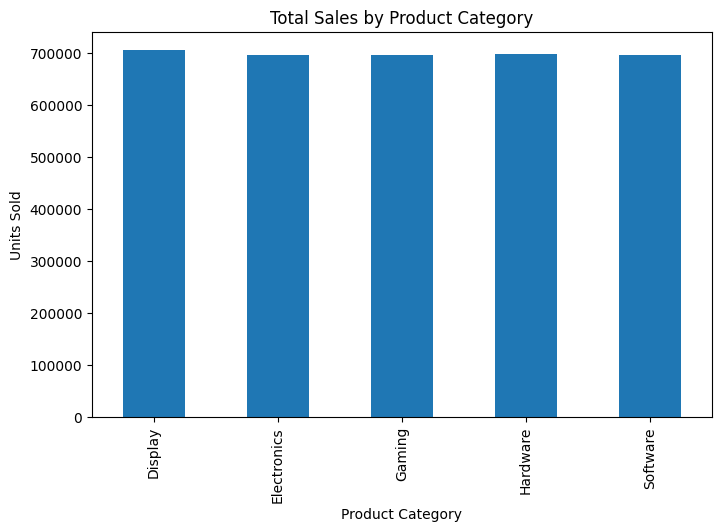

In [12]:
sales_by_category = df.groupby("Product Category")["Units Sold"].sum()

plt.figure(figsize=(8,5))
sales_by_category.plot(kind="bar")
plt.title("Total Sales by Product Category")
plt.ylabel("Units Sold")
plt.xlabel("Product Category")
plt.show()


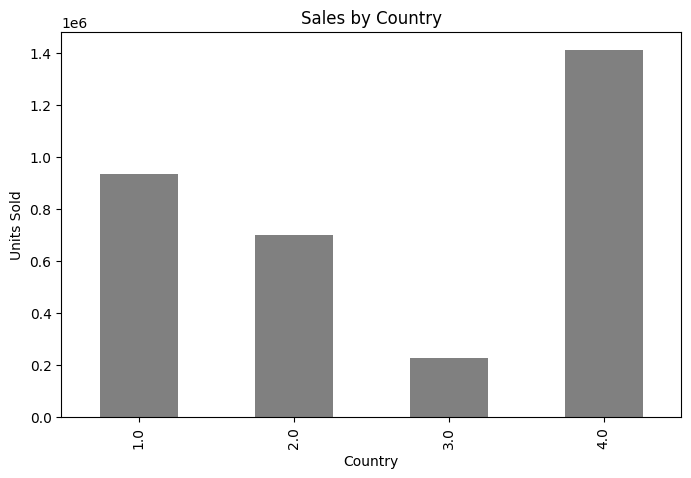

In [13]:
sales_by_country = df.groupby("Country")["Units Sold"].sum()

plt.figure(figsize=(8,5))
sales_by_country.plot(kind="bar", color="gray")
plt.title("Sales by Country")
plt.ylabel("Units Sold")
plt.xlabel("Country")
plt.show()


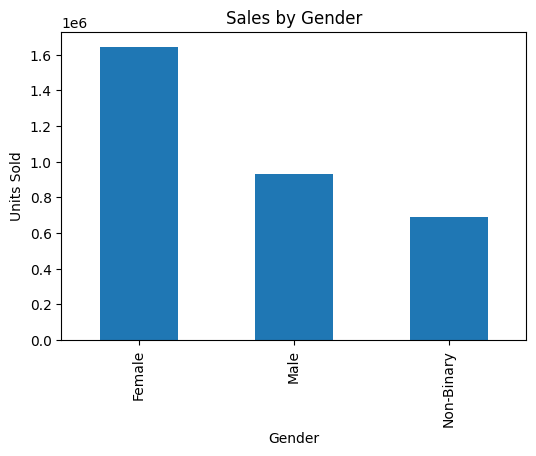

In [14]:
sales_by_gender = df.groupby("Gender")["Units Sold"].sum()

plt.figure(figsize=(6,4))
sales_by_gender.plot(kind="bar")
plt.title("Sales by Gender")
plt.ylabel("Units Sold")
plt.xlabel("Gender")
plt.show()


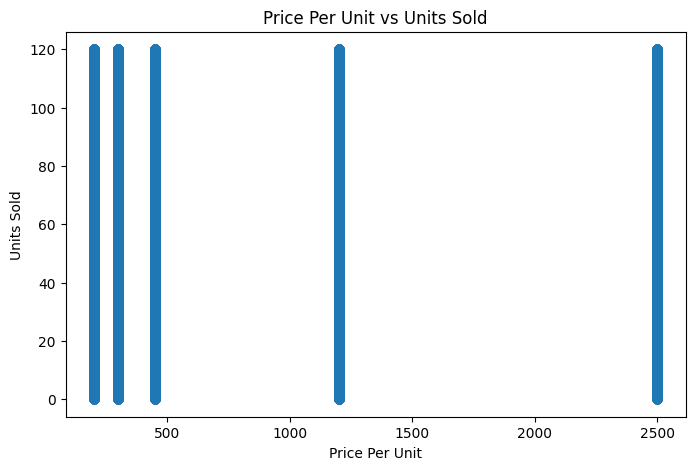

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(df["Price Per Unit"], df["Units Sold"])
plt.title("Price Per Unit vs Units Sold")
plt.xlabel("Price Per Unit")
plt.ylabel("Units Sold")
plt.show()


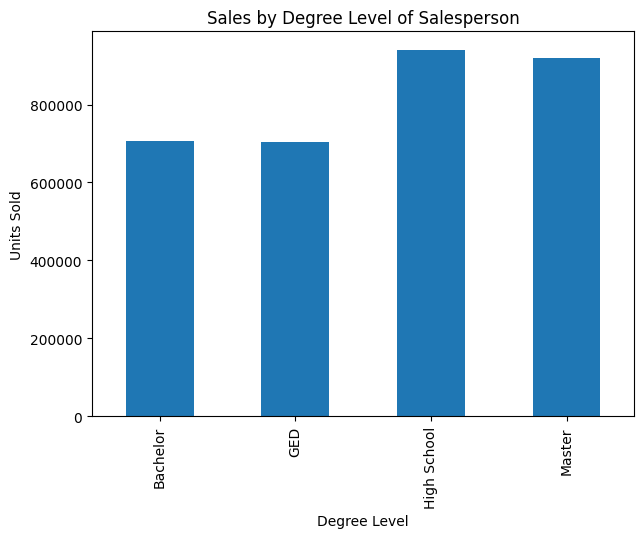

In [16]:
sales_by_degree = df.groupby("Degree Level")["Units Sold"].sum()

plt.figure(figsize=(7,5))
sales_by_degree.plot(kind="bar")
plt.title("Sales by Degree Level of Salesperson")
plt.ylabel("Units Sold")
plt.xlabel("Degree Level")
plt.show()


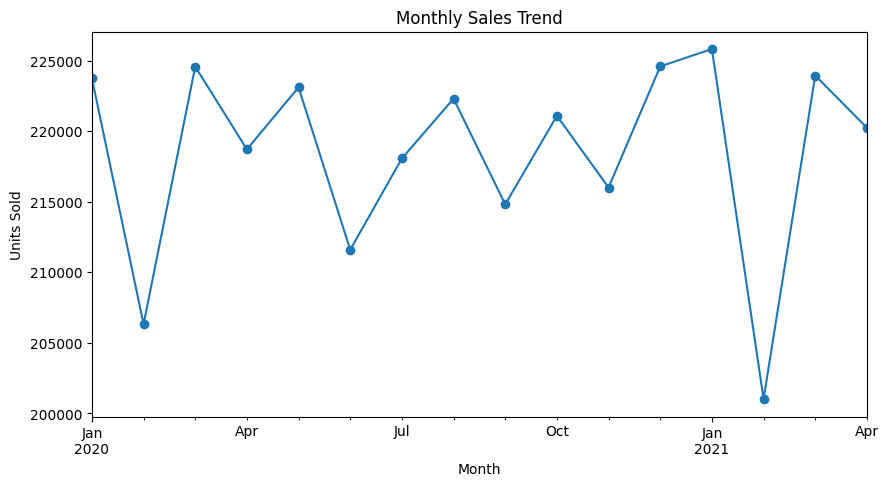

In [17]:
df["Date"] = pd.to_datetime(df["Date"])
monthly_sales = df.groupby(df["Date"].dt.to_period("M"))["Units Sold"].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.ylabel("Units Sold")
plt.xlabel("Month")
plt.show()


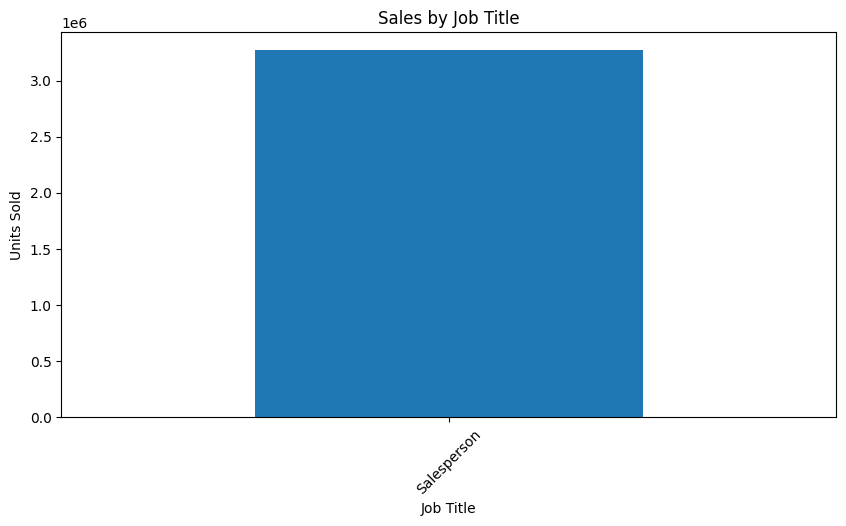

In [18]:
sales_by_job = df.groupby("Job Title")["Units Sold"].sum()

plt.figure(figsize=(10,5))
sales_by_job.plot(kind="bar")
plt.title("Sales by Job Title")
plt.ylabel("Units Sold")
plt.xlabel("Job Title")
plt.xticks(rotation=45)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_15400\2112592843.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_age = df.groupby("Age Group")["Units Sold"].sum()


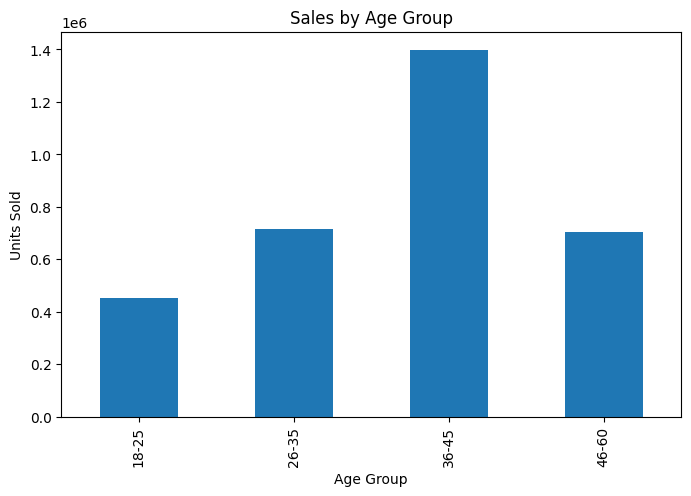

In [19]:
df["Age Group"] = pd.cut(df["Age"], bins=[18,25,35,45,60], 
                         labels=["18-25","26-35","36-45","46-60"])

sales_by_age = df.groupby("Age Group")["Units Sold"].sum()

plt.figure(figsize=(8,5))
sales_by_age.plot(kind="bar")
plt.title("Sales by Age Group")
plt.ylabel("Units Sold")
plt.xlabel("Age Group")
plt.show()


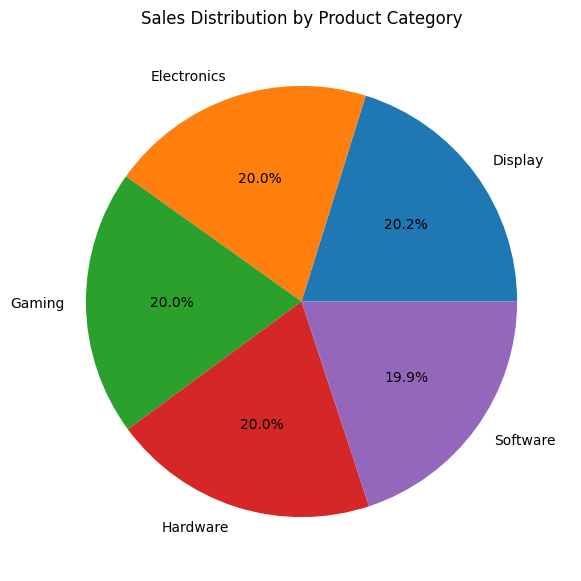

In [20]:
plt.figure(figsize=(7,7))
df.groupby("Product Category")["Units Sold"].sum().plot(kind="pie", autopct="%1.1f%%")
plt.title("Sales Distribution by Product Category")
plt.ylabel("")
plt.show()


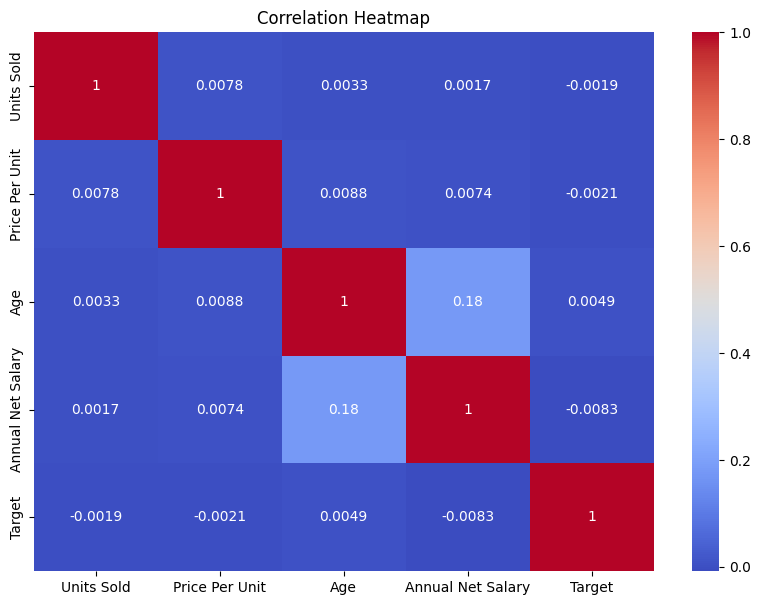

In [21]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(df[["Units Sold","Price Per Unit","Age","Annual Net Salary","Target"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


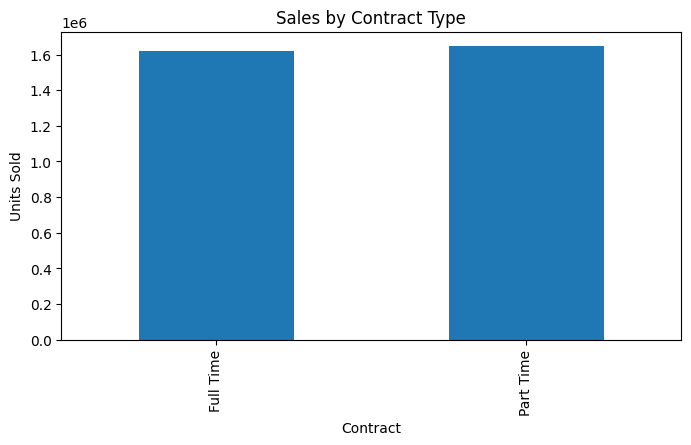

In [22]:
sales_by_contract = df.groupby("Contract")["Units Sold"].sum()

plt.figure(figsize=(8,4))
sales_by_contract.plot(kind="bar")
plt.title("Sales by Contract Type")
plt.ylabel("Units Sold")
plt.xlabel("Contract")
plt.show()


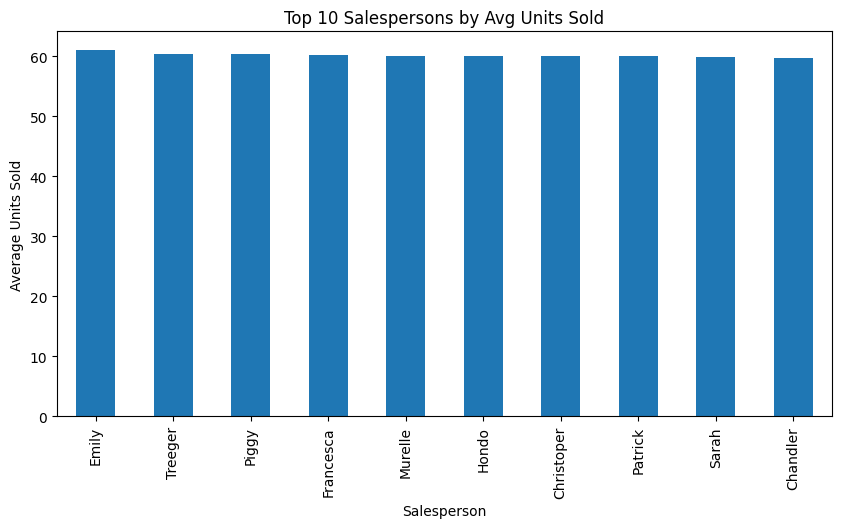

In [23]:
avg_sales_person = df.groupby("First Name")["Units Sold"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
avg_sales_person.plot(kind="bar")
plt.title("Top 10 Salespersons by Avg Units Sold")
plt.ylabel("Average Units Sold")
plt.xlabel("Salesperson")
plt.show()


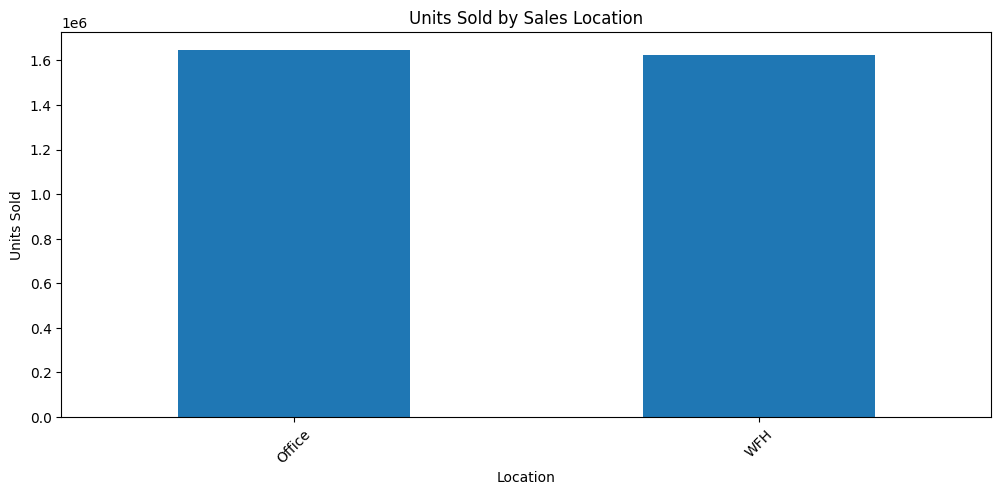

In [24]:
sales_by_location = df.groupby("Location")["Units Sold"].sum()

plt.figure(figsize=(12,5))
sales_by_location.plot(kind="bar")
plt.title("Units Sold by Sales Location")
plt.ylabel("Units Sold")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.show()


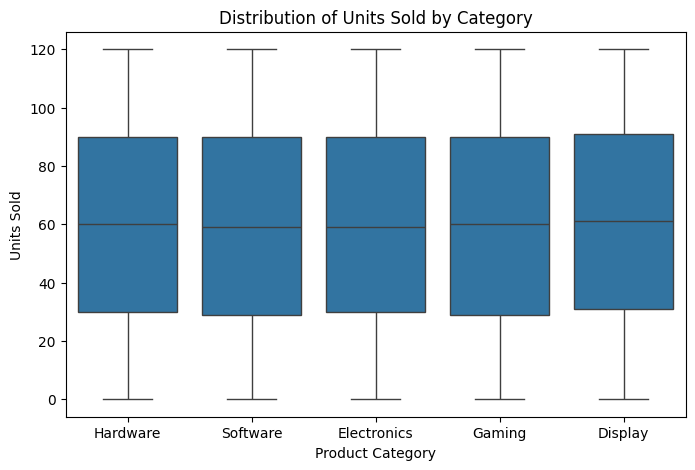

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Product Category", y="Units Sold")
plt.title("Distribution of Units Sold by Category")
plt.show()


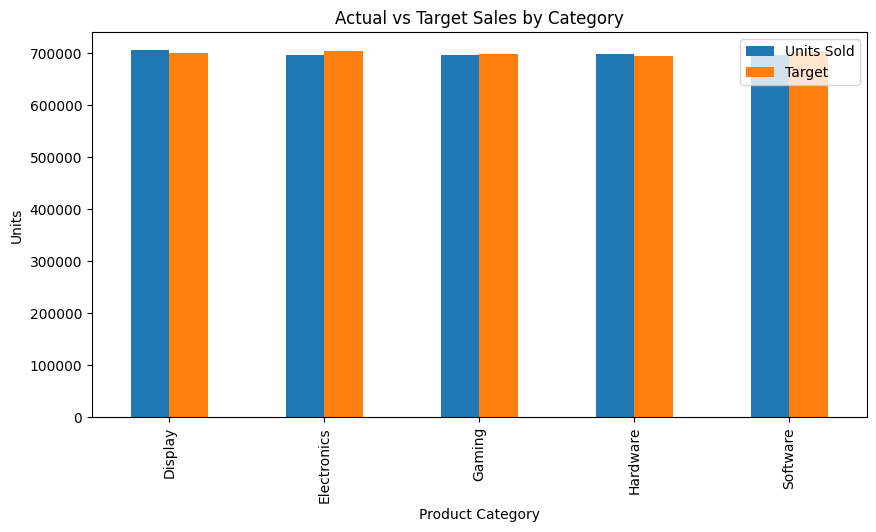

In [27]:
target_actual = df.groupby("Product Category")[["Units Sold","Target"]].sum()

target_actual.plot(kind="bar", figsize=(10,5))
plt.title("Actual vs Target Sales by Category")
plt.ylabel("Units")
plt.show()
